In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ebbd4f5e-e846-4c51-a351-80eec3e5d595',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [10]:
import pandas as pd

# This allows you to see all the columns, not just like 15
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Careful: If the API returns a huge dataset (like thousands of rows),
# showing all rows may freeze Jupyter. A safer choice is:
pd.set_option('display.max_rows', 50)   # show 50 rows
pd.set_option('display.max_columns', 50)  # show 50 columns


In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991145e+07,1.991145e+07,False,NaN,1,NaN,NaN,None,2025-08-25T19:37:00.000Z,111359.040050,8.466505e+10,49.7440,-0.930146,-1.431371,-4.345532,-5.740783,3.514200,1.506656,2.217320e+12,57.7427,2.338540e+12,None,2025-08-25T19:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
1,1027,Ethereum,ETH,ethereum,10469,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207071e+08,1.207071e+08,True,NaN,2,NaN,NaN,None,2025-08-25T19:37:00.000Z,4476.237049,6.189582e+10,62.7149,-2.263646,-7.214038,2.573616,19.604717,83.766246,67.295121,5.403136e+11,14.0707,5.403136e+11,None,2025-08-25T19:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-25T19:37:00.000Z,2.921773,7.429385e+09,63.4896,-1.331600,-5.100149,-4.822904,-8.199104,37.512177,25.061338,1.737936e+11,4.5259,2.921773e+11,None,2025-08-25T19:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
3,825,Tether USDt,USDT,tether,142643,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.671505e+11,1.697343e+11,True,NaN,4,NaN,NaN,None,2025-08-25T19:36:00.000Z,1.000068,1.717471e+11,56.4465,0.011339,-0.008008,-0.041783,-0.025188,-0.025555,-0.031737,1.671619e+11,4.3367,1.697458e+11,None,2025-08-25T19:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-26 01:13:03.286057
4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392873e+08,1.392873e+08,False,NaN,5,NaN,NaN,None,2025-08-25T19:36:00.000Z,861.778800,3.214515e+09,27.4372,-0.471946,-1.526175,2.094857,9.962169,33.480847,24.845207,1.200348e+11,3.1141,1.200348e+11,None,2025-08-25T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.405610e+08,6.083315e+08,True,NaN,6,5.252369e+08,1.014073e+11,None,2025-08-25T19:36:00.000Z,193.069650,1.366963e+10,58.5431,-2.123692,-7.544360,5.157883,3.780145,35.869390,8.323177,1.043659e+11,2.7076,1.174503e+11,None,2025-08-25T19:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
6,3408,USDC,USDC,usd-coin,30824,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.769584e+10,6.769584e+10,False,NaN,7,6.090122e+10,6.089209e+10,None,2025-08-25T19:36:00.000Z,0.999850,2.364436e+10,77.4399,-0.006257,-0.002496,0.000380,-0.007036,-0.007476,-0.001051,6.768569e+10,1.7560,6.768569e+10,None,2025-08-25T19:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-26 01:13:03.286057
7,1958,TRON,TRX,tron,1216,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466599e+10,9.466596e+10,True,NaN,8,7.165966e+10,2.495200e+10,None,2025-08-25T19:37:00.000Z,0.348201,1.841571e+09,122.1070,-0.867393,-5.106761,-0.382259,9.073037,28.245516,26.333056,3.296284e+10,0.8584,3.296283e+10,None,2025-08-25T19:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:13:03.286057
8,74,Dogecoin,DOGE,dogecoin,1276,2013-12-15T00:00:00.000Z,"[mineable, p

In [12]:
# Select only important columns
df_clean = df[[
    'name',
    'symbol',
    'quote.USD.price',
    'quote.USD.volume_24h',
    'quote.USD.market_cap',
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'timestamp'
]]

# Show the cleaned table
print(df_clean.head())


          name symbol  quote.USD.price  quote.USD.volume_24h  \
0      Bitcoin    BTC    111359.040050          8.466505e+10   
1     Ethereum    ETH      4476.237049          6.189582e+10   
2          XRP    XRP         2.921773          7.429385e+09   
3  Tether USDt   USDT         1.000068          1.717471e+11   
4          BNB    BNB       861.778800          3.214515e+09   

   quote.USD.market_cap  quote.USD.percent_change_1h  \
0          2.217320e+12                    -0.930146   
1          5.403136e+11                    -2.263646   
2          1.737936e+11                    -1.331600   
3          1.671619e+11                     0.011339   
4          1.200348e+11                    -0.471946   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                     -1.431371                    -4.345532   
1                     -7.214038                     2.573616   
2                     -5.100149                    -4.822904   
3                     

In [13]:
# Show all rows and columns without wrapping
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)   # <---- stops wrapping
pd.set_option('display.colheader_justify', 'center')  # prettier headers

In [14]:
print(df.head(15))   # or just df.head(15) in Jupyter

     id       name     symbol     slug      num_market_pairs  \
0       1      Bitcoin   BTC       bitcoin        12290        
1    1027     Ethereum   ETH      ethereum        10469        
2      52          XRP   XRP           xrp         1681        
3     825  Tether USDt  USDT        tether       142643        
4    1839          BNB   BNB           bnb         2679        
5    5426       Solana   SOL        solana          974        
6    3408         USDC  USDC      usd-coin        30824        
7    1958         TRON   TRX          tron         1216        
8      74     Dogecoin  DOGE      dogecoin         1276        
9    2010      Cardano   ADA       cardano         1567        
10   1975    Chainlink  LINK     chainlink         2069        
11  32196  Hyperliquid  HYPE   hyperliquid          135        
12    512      Stellar   XLM       stellar          741        
13  29470  Ethena USDe  USDe   ethena-usde          200        
14  20947          Sui   SUI           s

In [15]:
df[['name','symbol','quote.USD.price','quote.USD.market_cap']].head(10)

,name,symbol,quote.USD.price,quote.USD.market_cap
0,Bitcoin,BTC,111359.040050,2.217320e+12
1,Ethereum,ETH,4476.237049,5.403136e+11
2,XRP,XRP,2.921773,1.737936e+11
3,Tether USDt,USDT,1.000068,1.671619e+11
4,BNB,BNB,861.778800,1.200348e+11
5,Solana,SOL,193.069650,1.043659e+11
6,USDC,USDC,0.999850,6.768569e+10
7,TRON,TRX,0.348201,3.296284e+10
8,Dogecoin,DOGE,0.215827,3.251825e+10
9,Cardano,ADA,0.861325,3.077076e+10


In [16]:
# Clean up column names or Simplify Column Names
df.columns = df.columns.str.replace("quote.USD.", "", regex=False)
df.columns = df.columns.str.replace(".", "_", regex=False)

print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'price', 'volume_24h', 'volume_change_24h',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'percent_change_30d', 'percent_change_60d', 'percent_change_90d',
       'market_cap', 'market_cap_dominance', 'fully_diluted_market_cap', 'tvl',
       'last_updated', 'platform_id', 'platform_name', 'platform_symbol',
       'platform_slug', 'platform_token_address', 'timestamp'],
      dtype='object')


In [24]:
#To make it more readable, let’s bring important columns in front:
df = df[['name', 'symbol', 'price', 'market_cap', 'volume_24h', 
         'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'timestamp']]
print(df.head(10))

      name     symbol      price       market_cap    volume_24h   \
0      Bitcoin   BTC   111359.040050  2.217320e+12  8.466505e+10   
1     Ethereum   ETH     4476.237049  5.403136e+11  6.189582e+10   
2          XRP   XRP        2.921773  1.737936e+11  7.429385e+09   
3  Tether USDt  USDT        1.000068  1.671619e+11  1.717471e+11   
4          BNB   BNB      861.778800  1.200348e+11  3.214515e+09   
5       Solana   SOL      193.069650  1.043659e+11  1.366963e+10   
6         USDC  USDC        0.999850  6.768569e+10  2.364436e+10   
7         TRON   TRX        0.348201  3.296284e+10  1.841571e+09   
8     Dogecoin  DOGE        0.215827  3.251825e+10  3.800484e+09   
9      Cardano   ADA        0.861325  3.077076e+10  2.648230e+09   

   percent_change_1h  percent_change_24h  percent_change_7d  \
0     -0.930146            -1.431371         -4.345532        
1     -2.263646            -7.214038          2.573616        
2     -1.331600            -5.100149         -4.822904        

In [25]:
import os
import json
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'ebbd4f5e-e846-4c51-a351-80eec3e5d595',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return
    
    # Create DataFrame
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    # Append to global DataFrame
    try:
        df = df._append(df2, ignore_index=True)
    except NameError:
        df = df2  # if df not defined, initialize it

    # Save to CSV
    file_path = r'C:\Users\Yogender\Documents\Python Scripts\API.csv'
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df2.to_csv(file_path, mode='a', header=False, index=False)

    return df


In [26]:
import os 
from time import time
from time import sleep

for i in range(333):     # Run 333 times (about 5.5 hours if sleeping 1 min each loop)
    api_runner()         # call the API function you defined earlier
    print('API Runner completed')
    sleep(60)            # wait for 60 seconds before the next call
exit()


API Runner completed


KeyboardInterrupt: 

In [27]:
import os
import json
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

# =========================
# API RUNNER FUNCTION
# =========================
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start': '1',
        'limit': '15',   # Top 15 cryptos
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'ebbd4f5e-e846-4c51-a351-80eec3e5d595',  # 👈 replace with your API key
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("Error:", e)
        return None  

    # Normalize JSON → DataFrame
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    # Save to CSV
    file_path = r"C:\Users\Yogender\Documents\Python Scripts\API.csv"
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False, header=True)
    else:
        df.to_csv(file_path, mode='a', index=False, header=False)

    return df


# =========================
# MAIN LOOP
# =========================
if __name__ == "__main__":
    for i in range(333):  # about 5.5 hours
        df = api_runner()
        if df is not None:
            print(f"[{i+1}/333] API Runner completed at {df['timestamp'].iloc[0]}")
        else:
            print(f"[{i+1}/333] API Runner failed.")
        sleep(60)  # wait 1 minute

[1/333] API Runner completed at 2025-08-26 01:18:36.929300


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\Yogender\Documents\Python Scripts\API.csv')
df72

In [ ]:
#Load your CSV
import pandas as pd

df72 = pd.read_csv(r"C:\Users\Yogender\Documents\Python Scripts\API.csv")
print(df72.head())
print(df72.columns)


In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991145e+07,1.991145e+07,False,NaN,1,NaN,NaN,None,2025-08-25T19:48:00.000Z,111287.906721,8.217611e+10,36.7541,-0.965651,-1.167557,-4.298705,-5.912455,3.423078,1.210186,2.215903e+12,57.9232,2.337046e+12,None,2025-08-25T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
1,1027,Ethereum,ETH,ethereum,10469,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207071e+08,1.207071e+08,True,NaN,2,NaN,NaN,None,2025-08-25T19:48:00.000Z,4473.255519,5.987251e+10,44.9894,-2.290104,-7.105420,2.712822,19.331190,83.295748,66.520328,5.399537e+11,14.1143,5.399537e+11,None,2025-08-25T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-25T19:48:00.000Z,2.911957,7.036866e+09,34.9913,-1.419428,-4.403985,-5.163848,-8.728393,36.487656,24.415496,1.732098e+11,4.5277,2.911957e+11,None,2025-08-25T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
3,825,Tether USDt,USDT,tether,142643,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.671505e+11,1.697343e+11,True,NaN,4,NaN,NaN,None,2025-08-25T19:46:00.000Z,0.999861,1.642463e+11,38.5563,-0.006951,-0.114219,-0.054377,-0.050027,-0.037691,-0.043818,1.671274e+11,4.3644,1.697107e+11,None,2025-08-25T19:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-26 01:18:36.929300
4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392873e+08,1.392873e+08,False,NaN,5,NaN,NaN,None,2025-08-25T19:47:00.000Z,859.897701,3.148083e+09,20.2079,-0.593565,-1.051032,1.918891,9.657851,33.173548,24.475684,1.197728e+11,3.1308,1.197728e+11,None,2025-08-25T19:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.405609e+08,6.083314e+08,True,NaN,6,5.252369e+08,1.010864e+11,None,2025-08-25T19:46:00.000Z,192.458685,1.311508e+10,40.2783,-2.154026,-6.547162,4.901354,3.265876,35.053558,7.992190,1.040356e+11,2.7168,1.170787e+11,None,2025-08-25T19:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
6,3408,USDC,USDC,usd-coin,30824,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.767997e+10,6.767997e+10,False,NaN,7,6.090122e+10,6.090432e+10,None,2025-08-25T19:47:00.000Z,1.000051,2.236337e+10,51.1210,0.025152,0.011026,0.011574,0.017340,0.024476,0.025180,6.768342e+10,1.7692,6.768342e+10,None,2025-08-25T19:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-26 01:18:36.929300
7,1958,TRON,TRX,tron,1216,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.466599e+10,9.466592e+10,True,NaN,8,7.165966e+10,2.489399e+10,None,2025-08-25T19:48:00.000Z,0.347392,1.794524e+09,93.1144,-1.020440,-4.800629,-0.595687,8.839986,28.007142,25.887635,3.288621e+10,0.8596,3.288618e+10,None,2025-08-25T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-26 01:18:36.929300
8,74,Dogecoin,DOGE,dogecoin,1276,2013-12-15T00:00:00.000Z,"[mineable, pow, s

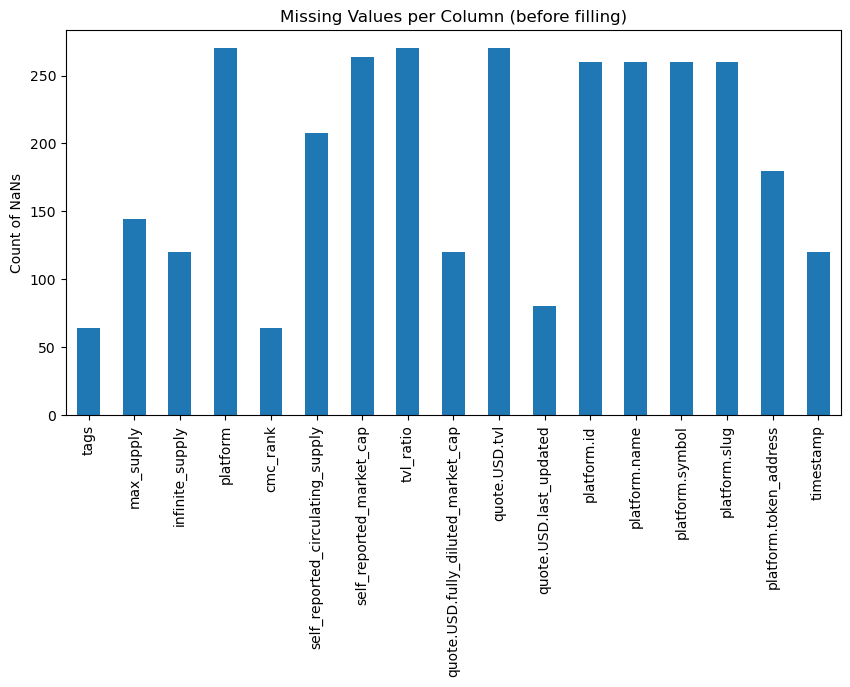

In [29]:
import matplotlib.pyplot as plt

# Make a copy before filling NaN
df_missing = pd.read_csv(r'C:\Users\Yogender\Documents\Python Scripts\API.csv')

missing = df_missing.isnull().sum()

if missing.sum() > 0:
    plt.figure(figsize=(10,5))
    missing[missing > 0].plot(kind='bar')
    plt.title("Missing Values per Column (before filling)")
    plt.ylabel("Count of NaNs")
    plt.show()
else:
    print("✅ No missing values found in dataset!")


In [30]:
import pandas as pd

# Load data
df72 = pd.read_csv(r'C:\Users\Yogender\Documents\Python Scripts\API.csv')

# Replace NaN values with something meaningful
df72 = df72.fillna("Data inaccessible by API")

# Double-check if any missing values remain
missing_after = df72.isnull().sum()

if missing_after.sum() == 0:
    print("✅ No missing values found in dataset after replacement.")
else:
    print("⚠️ Still some missing values remain:")
    print(missing_after[missing_after > 0])


✅ No missing values found in dataset after replacement.


In [31]:
df72.head(10)


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.991126e+07,19911262.0,False,Data inaccessible by API,1.0,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25T10:15:00.000Z,111640.111987,8.081838e+10,53.1833,0.250981,-2.749575,-3.119807,-5.119940,3.939071,1.627440,2.222896e+12,57.4757,2344442351718.959961,Data inaccessible by API,2025-08-25T10:15:00.000Z,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25 15:46:36.871867
1,1,1027,Ethereum,ETH,ethereum,10469,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",Data inaccessible by API,1.207071e+08,120707098.1711658,True,Data inaccessible by API,2.0,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25T10:14:00.000Z,4602.477377,6.247887e+10,123.8602,0.238440,-3.443300,7.331371,22.409765,86.704703,74.781150,5.555517e+11,14.3623,555551688532.47998,Data inaccessible by API,2025-08-25T10:14:00.000Z,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25 15:46:36.871867
2,2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,5.948226e+10,99985819185.0,False,Data inaccessible by API,3.0,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25T10:15:00.000Z,2.950956,7.629972e+09,116.8216,0.454666,-2.300538,-0.442570,-8.015647,35.423847,27.388126,1.755296e+11,4.5379,295095631865.0,Data inaccessible by API,2025-08-25T10:15:00.000Z,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25 15:46:36.871867
3,3,825,Tether USDt,USDT,tether,142589,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",Data inaccessible by API,1.671505e+11,169734252948.3468,True,Data inaccessible by API,4.0,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25T10:14:00.000Z,0.999799,1.666829e+11,83.7180,0.008668,0.016923,-0.080776,-0.064432,-0.053951,-0.036855,1.671170e+11,4.3204,169700161594.149994,Data inaccessible by API,2025-08-25T10:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-25 15:46:36.871867
4,4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",Data inaccessible by API,1.392873e+08,139287317.95,False,Data inaccessible by API,5.0,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25T10:14:00.000Z,858.296637,3.107586e+09,35.3680,-0.055986,-0.890533,3.294685,9.402054,32.694255,25.985993,1.195498e+11,3.0906,119549836637.339996,Data inaccessible by API,2025-08-25T10:14:00.000Z,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,Data inaccessible by API,2025-08-25 15:46:36.871867
5,5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",Data inaccessible by API,5.404374e+08,608187600.7552623,True,Data inaccessible by API,6.0,525236893.3,103918907683.864716,Data inaccessible by API,2025-08-25

In [32]:
#save the cleaned dataset as a new CSV so you can re-use it later:

df72.to_csv(r'C:\Users\Yogender\Documents\Python Scripts\API_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as API_cleaned.csv")


✅ Cleaned dataset saved as API_cleaned.csv


In [33]:
# --- DATA PROFILING / SUMMARY REPORT ---

print("📊 DATASET SUMMARY 📊\n")

# Shape of dataset
print(f"Total Rows: {df72.shape[0]}")
print(f"Total Columns: {df72.shape[1]}\n")

# Unique values count
print("🔹 Unique Values per Column:\n")
print(df72.nunique())
print("\n")


📊 DATASET SUMMARY 📊

Total Rows: 390
Total Columns: 38

🔹 Unique Values per Column:

Unnamed: 0                             29
id                                     30
name                                   27
symbol                                 30
slug                                   32
num_market_pairs                       36
date_added                             33
tags                                   25
max_supply                             30
circulating_supply                     43
total_supply                           24
infinite_supply                         3
platform                               16
cmc_rank                               23
self_reported_circulating_supply       56
self_reported_market_cap              111
tvl_ratio                              13
last_updated                          127
quote.USD.price                       340
quote.USD.volume_24h                  339
quote.USD.volume_change_24h           340
quote.USD.percent_change_1h      

In [48]:
# Clean column names (remove "quote.USD." prefix)
df72.columns = df72.columns.str.replace("quote.USD.", "", regex=False)

# Convert timestamp column to datetime if not already
df72['timestamp'] = pd.to_datetime(df72['timestamp'])


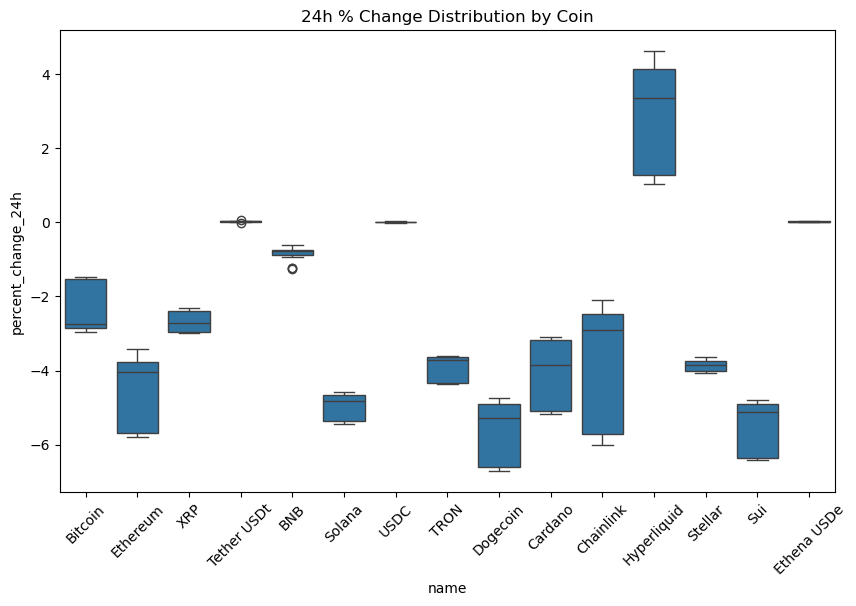

In [49]:
#Daily % Change Distribution
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df72, x="name", y="percent_change_24h")
plt.title("24h % Change Distribution by Coin")
plt.xticks(rotation=45)
plt.show()


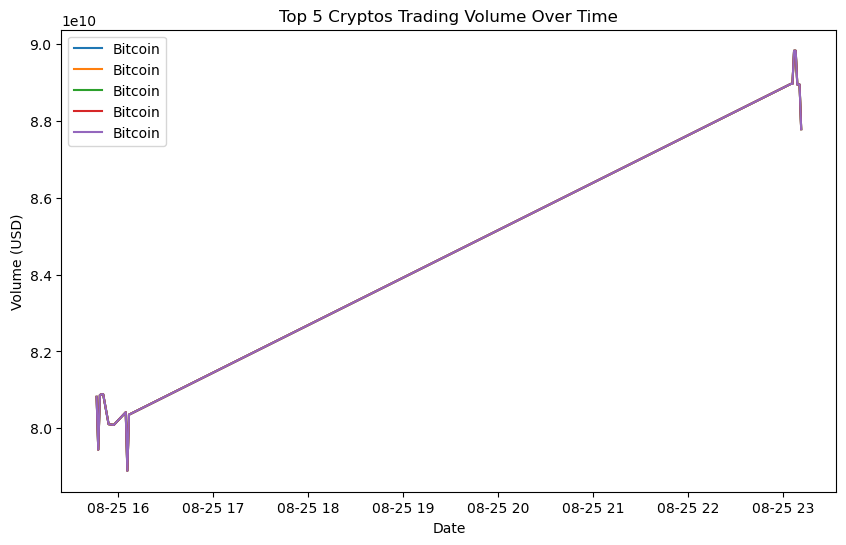

In [51]:
import matplotlib.pyplot as plt

# Select top 5 coins by market cap
top_coins = df72.nlargest(5, 'market_cap')['name'].tolist()

# Plot Trading Volume Over Time
plt.figure(figsize=(10,6))
for coin in top_coins:
    subset = df72[df72['name'] == coin]
    plt.plot(subset['timestamp'], subset['volume_24h'], label=coin)

plt.title("Top 5 Cryptos Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.legend()
plt.show()



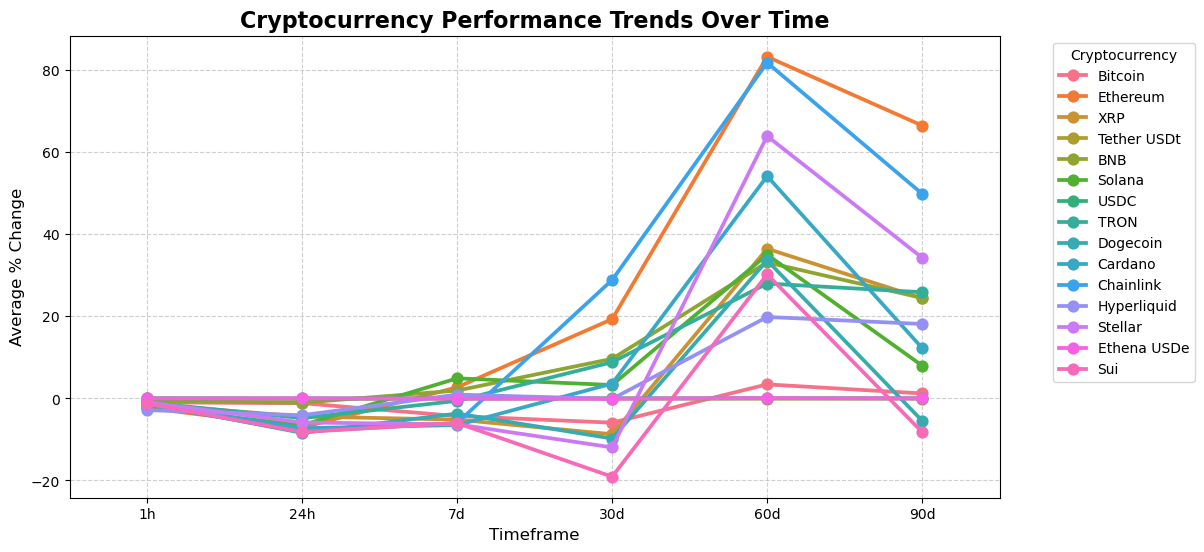

In [52]:
# Format float values for better readability
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# --- TREND ANALYSIS OVER MULTIPLE TIMEFRAMES ---
# Group data by coin and calculate mean % change across timeframes
df3 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
]].mean()

# Reshape dataset (wide → long format)
df4 = df3.stack().to_frame(name='values').reset_index()

# Rename columns for clarity
df4 = df4.rename(columns={'level_1': 'percent_change'})

# Replace long API column names with cleaner labels
df4['percent_change'] = df4['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

# --- VISUALIZATION ---
plt.figure(figsize=(12,6))
sns.pointplot(x='percent_change', y='values', hue='name', data=df4)
plt.title('Cryptocurrency Performance Trends Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Timeframe', fontsize=12)
plt.ylabel('Average % Change', fontsize=12)
plt.legend(title='Cryptocurrency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [55]:
# Save cleaned dataset
df72.to_csv(r"C:\Users\Yogender\Documents\Python Scripts\crypto_trends.csv", index=False)
df72.to_excel(r"C:\Users\Yogender\Documents\Python Scripts\crypto_trends.xlsx", index=False)

print("✅ Cleaned dataset saved as 'crypto_trends.csv' and 'crypto_trends.xlsx'")


✅ Cleaned dataset saved as 'crypto_trends.csv' and 'crypto_trends.xlsx'


In [59]:
# Assuming your main dataframe is df72 (cleaned from API)
import pandas as pd

# Example: keep relevant columns
df = df72.copy()

# Convert percent change columns to numeric (replace 'Data inaccessible by API' with NaN first)
percent_cols = ['percent_change_1h','percent_change_24h','percent_change_7d',
                'percent_change_30d','percent_change_60d','percent_change_90d']

for col in percent_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by coin name
df3 = df.groupby('name', sort=False)[percent_cols].mean()

# Stack into long format
df4 = df3.stack()
df5 = df4.to_frame(name='values').reset_index()
df7 = df5.rename(columns={'level_1': 'percent_change'})

# Rename percent_change values for readability
df7['percent_change'] = df7['percent_change'].replace(
    {'percent_change_1h':'1h','percent_change_24h':'24h','percent_change_7d':'7d',
     'percent_change_30d':'30d','percent_change_60d':'60d','percent_change_90d':'90d'})


✅ Cleaned dataset saved at:
- C:\Users\Yogender\Documents\Python Scripts\crypto_trends.csv
- C:\Users\Yogender\Documents\Python Scripts\crypto_trends.xlsx


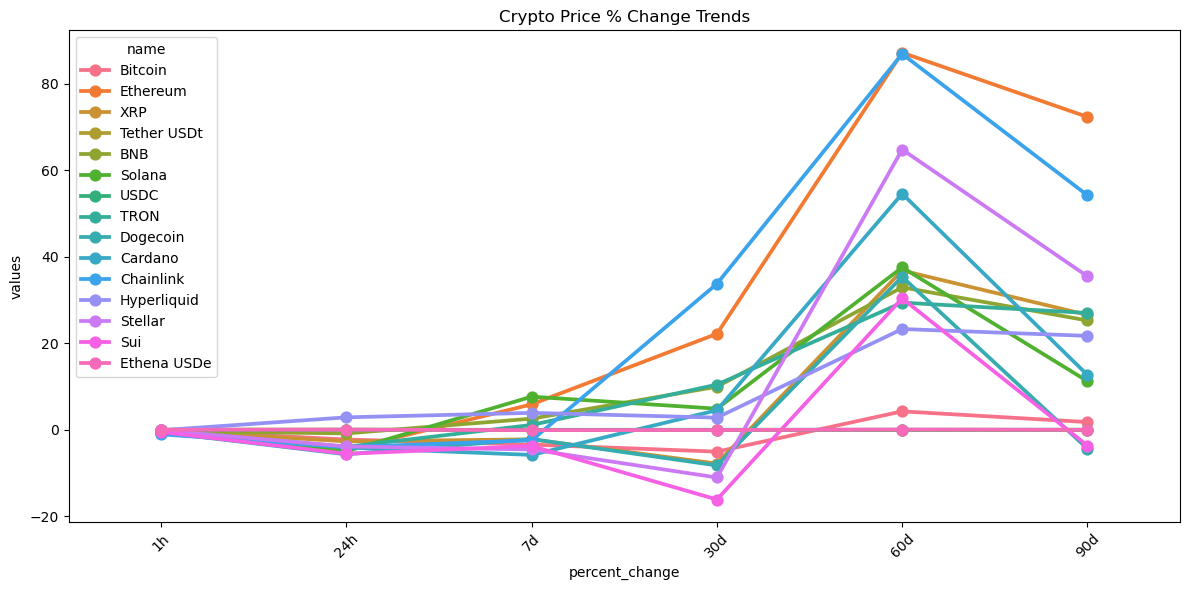

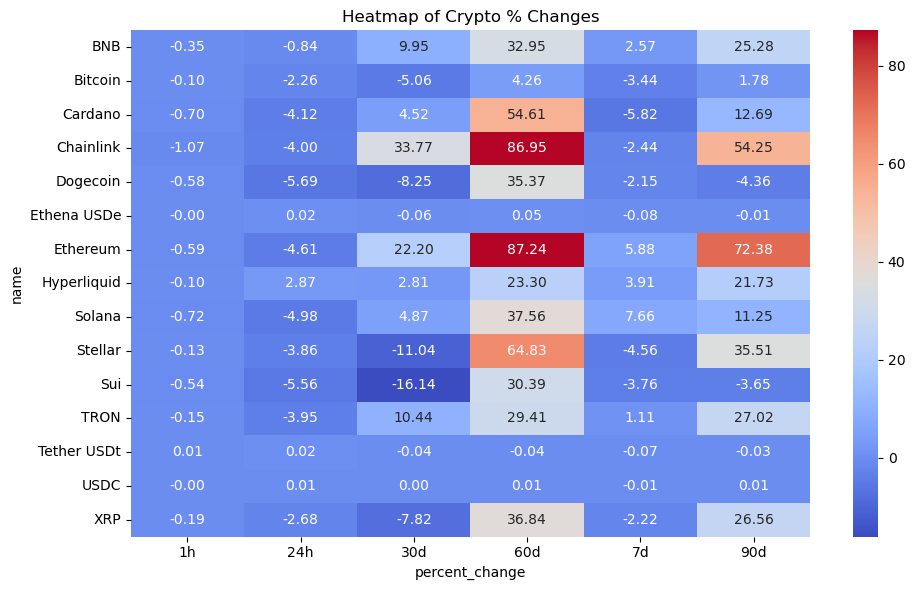

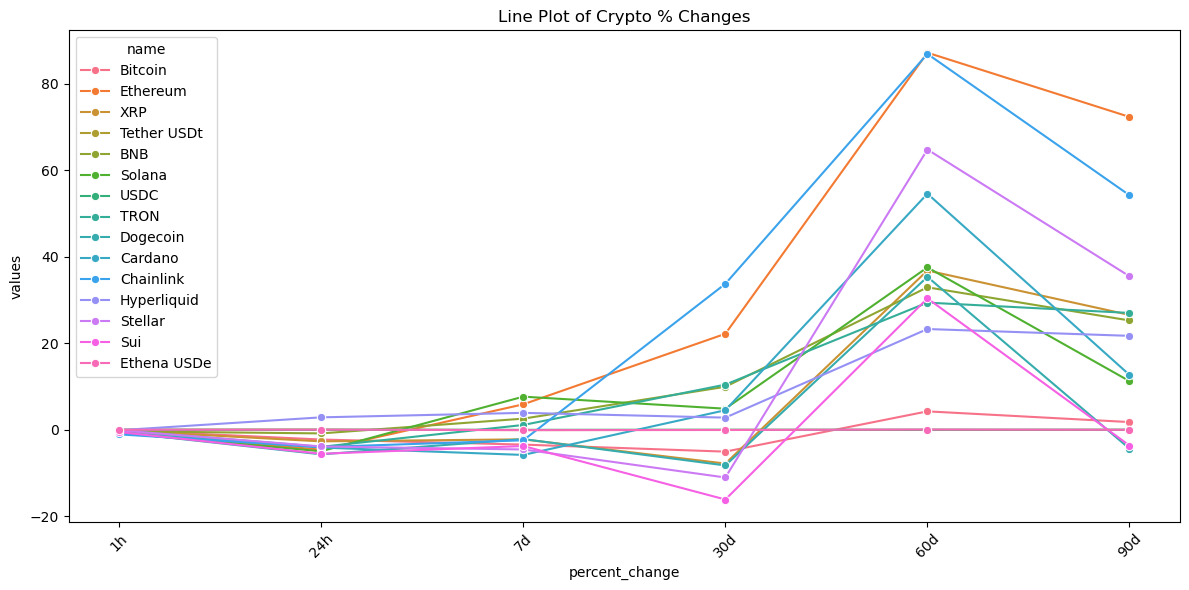

📊 Visualization images saved at:
- C:\Users\Yogender\Documents\Python Scripts\crypto_pointplot.png
- C:\Users\Yogender\Documents\Python Scripts\crypto_heatmap.png
- C:\Users\Yogender\Documents\Python Scripts\crypto_lineplot.png


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define path
save_path = r"C:\Users\Yogender\Documents\Python Scripts"

# Save cleaned dataset
df7.to_csv(f"{save_path}\\crypto_trends.csv", index=False)
df7.to_excel(f"{save_path}\\crypto_trends.xlsx", index=False)
print("✅ Cleaned dataset saved at:")
print(f"- {save_path}\\crypto_trends.csv")
print(f"- {save_path}\\crypto_trends.xlsx")

# -----------------------
# 1. Point Plot
# -----------------------
plt.figure(figsize=(12,6))
sns.pointplot(x='percent_change', y='values', hue='name', data=df7)
plt.title("Crypto Price % Change Trends")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{save_path}\\crypto_pointplot.png")
plt.show()

# -----------------------
# 2. Heatmap
# -----------------------
df_pivot = df7.pivot(index='name', columns='percent_change', values='values')
plt.figure(figsize=(10,6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Crypto % Changes")
plt.tight_layout()
plt.savefig(f"{save_path}\\crypto_heatmap.png")
plt.show()

# -----------------------
# 3. Line Plot
# -----------------------
plt.figure(figsize=(12,6))
sns.lineplot(x='percent_change', y='values', hue='name', marker="o", data=df7)
plt.title("Line Plot of Crypto % Changes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{save_path}\\crypto_lineplot.png")
plt.show()

print("📊 Visualization images saved at:")
print(f"- {save_path}\\crypto_pointplot.png")
print(f"- {save_path}\\crypto_heatmap.png")
print(f"- {save_path}\\crypto_lineplot.png")
